<a href="https://colab.research.google.com/github/shweta-todgire/Data-Science-Codes/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SHWETA TODGIRE**

Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks.
In this project, it is used for binary classification to predict whether a person has diabetes (0 = No, 1 = Yes).

**Objectives**

- Train a Decision Tree classifier and visualize the tree.
- Handle missing values using mean/median.
- Convert categorical columns using Label Encoding (if any).
- Evaluate both models using:
    1. Accuracy
    2. Precision
    3. Recall
    4. F1-score
    5. Confusion Matrix
    6. ROC Curve & AUC Score
- Apply Cost Complexity Pruning (Decision Tree tuning).

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/diabetes.csv")
print("DataFrame created")

# Check Missing Values
print(df.isnull().sum())

df = df.fillna(df.median())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

DataFrame created
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# Decision Tree Classifier
clf = DecisionTreeClassifier(
    random_state=0,
    criterion='gini'
)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
# Accuracy Scores
from sklearn.metrics import accuracy_score

pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Train Accuracy:", accuracy_score(y_train, pred_train))

Test Accuracy:  0.7229437229437229
Train Accuracy: 1.0


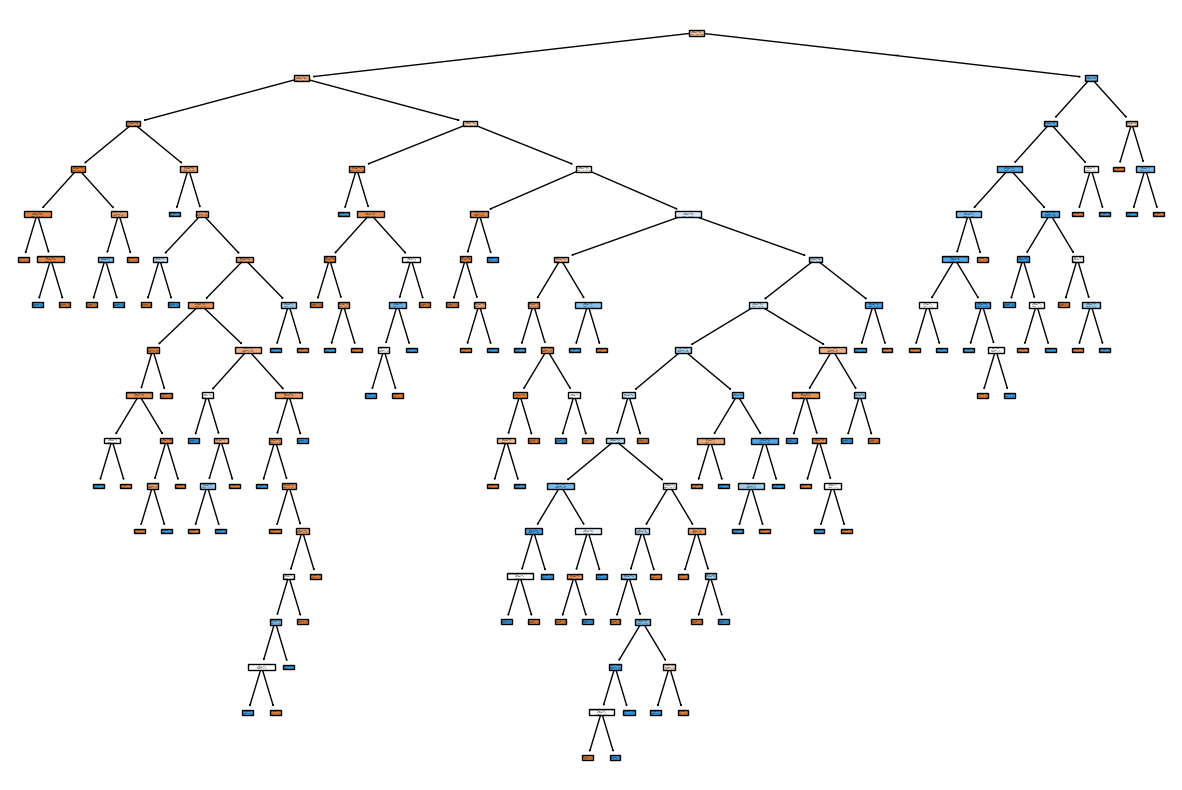

In [11]:
#Decision tre visualization
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()

In [12]:
# Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

print("\nTest Classification Report:\n", classification_report(y_test, pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, pred_test))

print("\nTrain Classification Report:\n", classification_report(y_train, pred_train))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, pred_train))


Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.60      0.64      0.62        81

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.72      0.73       231

Test Confusion Matrix:
 [[115  35]
 [ 29  52]]

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Train Confusion Matrix:
 [[350   0]
 [  0 187]]


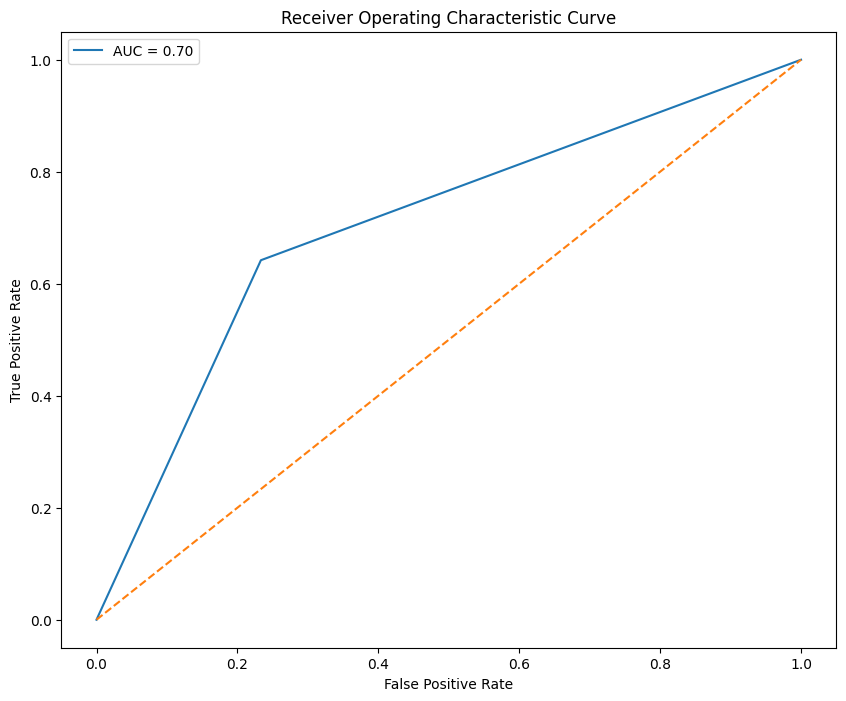

In [13]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

dt_probs = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
auc_score_dt = auc(fpr_dt, tpr_dt)

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr_dt, tpr_dt)

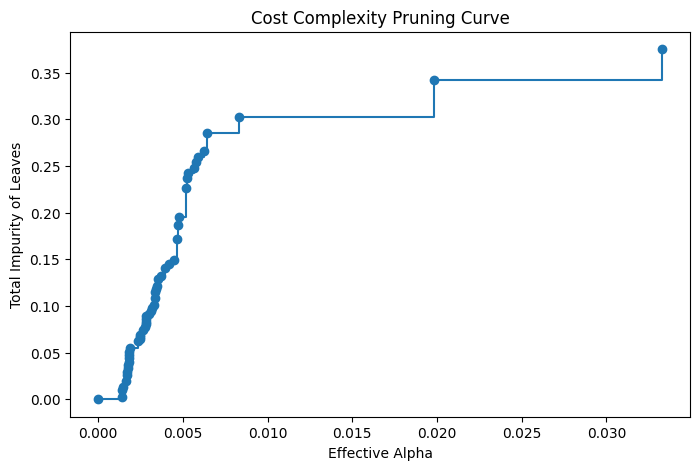

In [14]:
# Cost-Complexity Pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Cost Complexity Pruning Curve")
plt.show()